In [42]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
import cv2
from tensorflow.keras.models import load_model


In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [40]:
ann = keras.Sequential([
    keras.layers.Input((28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

ann.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history1 = ann.fit(X_train, y_train, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7597 - loss: 0.8667 - val_accuracy: 0.8969 - val_loss: 0.3789
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8934 - loss: 0.3842 - val_accuracy: 0.9017 - val_loss: 0.3420
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8978 - loss: 0.3494 - val_accuracy: 0.9043 - val_loss: 0.3285
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9068 - loss: 0.3208 - val_accuracy: 0.9107 - val_loss: 0.3081
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9085 - loss: 0.3048 - val_accuracy: 0.9105 - val_loss: 0.2995
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9143 - loss: 0.2903 - val_accuracy: 0.9116 - val_loss: 0.3066
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9144 - loss: 0.2887 - val_accuracy: 0.9184 - val_loss: 0.2759
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9185 - loss: 0.2693 - 

In [1]:
figure, axis = plt.subplots(ncols=2, figsize=(15,5))
axis[0].plot(history1.history['loss'])
axis[0].plot(history1.history['val_loss'])
axis[0].set_xlabel('Epochs')
axis[0].set_ylabel('Loss')
axis[0].legend(['train','test'])
axis[1].plot(history1.history['accuracy'])
axis[1].plot(history1.history['val_accuracy'])
axis[1].set_xlabel('Epochs')
axis[1].set_ylabel('Accuracy')
axis[1].legend(['train','test'])
plt.show()


NameError: name 'plt' is not defined

In [ ]:
train_evaluation = ann.evaluate(X_train , y_train)
test_evaluation = ann.evaluate(X_test , y_test)

print("-"*80)
print(f"Train Loss = {train_evaluation[0]}, Train Accuracy = {train_evaluation[1]}")
print("-"*80)
print(f"Test Loss = {test_evaluation[0]}, Test Accuracy = {test_evaluation[1]}")
print("-"*80)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9263 - loss: 0.2439
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9176 - loss: 0.2732
--------------------------------------------------------------------------------
Train Loss = 0.24787922203540802, Train Accuracy = 0.9253333210945129
--------------------------------------------------------------------------------
Test Loss = 0.23732174932956696, Test Accuracy = 0.9297999739646912
--------------------------------------------------------------------------------


In [ ]:
predection1 = np.argmax(ann.predict(X_test), axis=1)
predection1

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
print(classification_report(y_test , predection1))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.96      0.99      0.98      1135
           2       0.94      0.92      0.93      1032
           3       0.90      0.93      0.91      1010
           4       0.94      0.92      0.93       982
           5       0.94      0.88      0.91       892
           6       0.94      0.95      0.95       958
           7       0.92      0.93      0.92      1028
           8       0.91      0.90      0.90       974
           9       0.91      0.90      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



Text(50.722222222222214, 0.5, 'Truth')

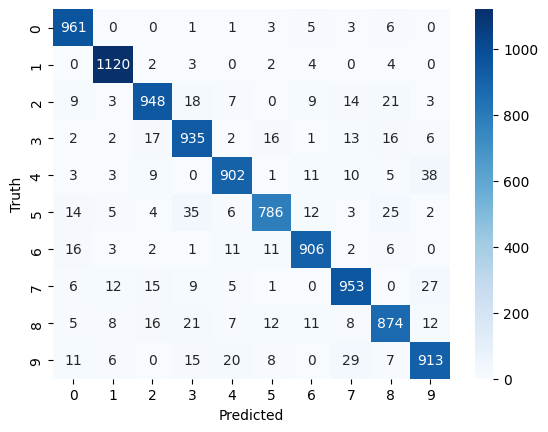

In [ ]:
cm = tf.math.confusion_matrix(y_test , predection1)
sns.heatmap(cm, annot=True, fmt='d' ,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**NORMALISATION TIME**

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255


In [ ]:
history2 = ann.fit(X_train_scaled, y_train, epochs=15, validation_split=0.3)

Epoch 1/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9936 - loss: 0.0314 - val_accuracy: 0.9730 - val_loss: 0.0911
Epoch 2/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9952 - loss: 0.0254 - val_accuracy: 0.9732 - val_loss: 0.0923
Epoch 3/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9959 - loss: 0.0216 - val_accuracy: 0.9718 - val_loss: 0.0920
Epoch 4/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9971 - loss: 0.0179 - val_accuracy: 0.9749 - val_loss: 0.0879
Epoch 5/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9976 - loss: 0.0152 - val_accuracy: 0.9744 - val_loss: 0.0896
Epoch 6/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9985 - loss: 0.0123 - val_accuracy: 0.9733 - val_loss: 0.0926
Epoch 7/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9985 - loss: 0.0112 - val_accuracy: 0.9742 - val_loss: 0.0915
Epoch 8/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9991 - loss: 0.0089 -

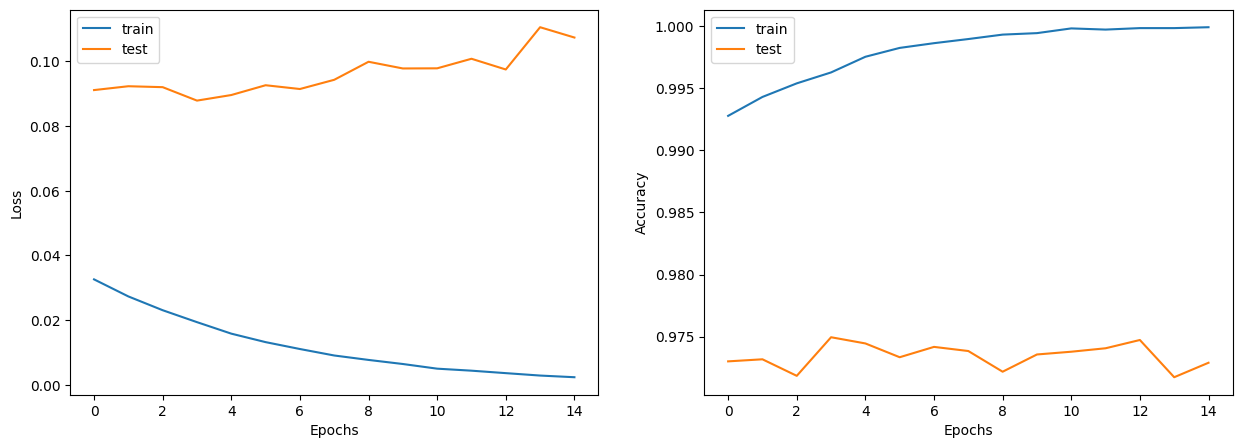

In [ ]:
figure, axis = plt.subplots(ncols=2, figsize=(15,5))
axis[0].plot(history2.history['loss'])
axis[0].plot(history2.history['val_loss'])
axis[0].set_xlabel('Epochs')
axis[0].set_ylabel('Loss')
axis[0].legend(['train','test'])
axis[1].plot(history2.history['accuracy'])
axis[1].plot(history2.history['val_accuracy'])
axis[1].set_xlabel('Epochs')
axis[1].set_ylabel('Accuracy')
axis[1].legend(['train','test'])
plt.show()

In [ ]:
train_evaluation_scaled = ann.evaluate(X_train_scaled , y_train)
test_evaluation_scaled = ann.evaluate(X_test_scaled , y_test)

print("-"*80)
print(f"Train Loss = {train_evaluation_scaled[0]}, Train Accuracy = {test_evaluation_scaled[1]}")
print("-"*80)
print(f"Test Loss = {train_evaluation_scaled[0]}, Test Accuracy = {test_evaluation_scaled[1]}")
print("-"*80)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9982 - loss: 0.0092
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9763 - loss: 0.0980
--------------------------------------------------------------------------------
Train Loss = 0.03466694802045822, Train Accuracy = 0.9786999821662903
--------------------------------------------------------------------------------
Test Loss = 0.03466694802045822, Test Accuracy = 0.9786999821662903
--------------------------------------------------------------------------------


In [ ]:
predection2 = np.argmax(ann.predict(X_test_scaled), axis=1)
predection2

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
print(classification_report(y_test , predection2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Text(50.722222222222214, 0.5, 'Truth')

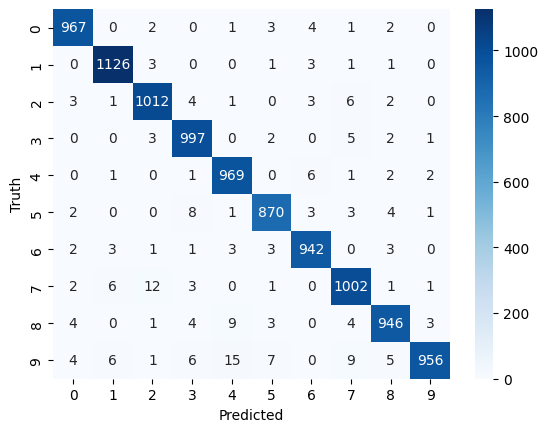

In [ ]:
cm = tf.math.confusion_matrix(y_test , predection2)
sns.heatmap(cm, annot=True, fmt='d' ,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### **CNN**

In [6]:
cnn = keras.Sequential([
    keras.layers.Input((28,28,1)),
    keras.layers.Conv2D(filters=32 , kernel_size=(3,3) , activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=62 , kernel_size=(3,3) , activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [8]:
history_cnn = cnn.fit(X_train_scaled , y_train , epochs=5 , validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8857 - loss: 0.3792 - val_accuracy: 0.9729 - val_loss: 0.0877
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9819 - loss: 0.0546 - val_accuracy: 0.9765 - val_loss: 0.0764
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9876 - loss: 0.0378 - val_accuracy: 0.9849 - val_loss: 0.0504
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9915 - loss: 0.0237 - val_accuracy: 0.9871 - val_loss: 0.0432
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9942 - loss: 0.0179 - val_accuracy: 0.9872 - val_loss: 0.0441


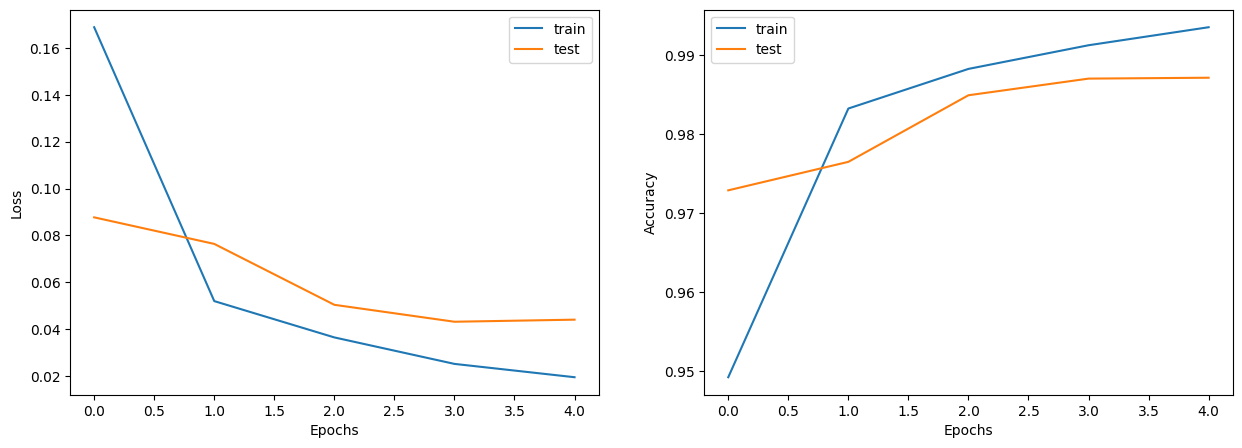

In [9]:
figure, axis = plt.subplots(ncols=2, figsize=(15,5))
axis[0].plot(history_cnn.history['loss'])
axis[0].plot(history_cnn.history['val_loss'])
axis[0].set_xlabel('Epochs')
axis[0].set_ylabel('Loss')
axis[0].legend(['train','test'])
axis[1].plot(history_cnn.history['accuracy'])
axis[1].plot(history_cnn.history['val_accuracy'])
axis[1].set_xlabel('Epochs')
axis[1].set_ylabel('Accuracy')
axis[1].legend(['train','test'])
plt.show()

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9934 - loss: 3.1492
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9842 - loss: 11.4182
--------------------------------------------------------------------------------
Train Loss = 4.9569244384765625, Train Accuracy = 0.9865000247955322
--------------------------------------------------------------------------------
Test Loss = 4.9569244384765625, Test Accuracy = 0.9865000247955322
--------------------------------------------------------------------------------
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99     

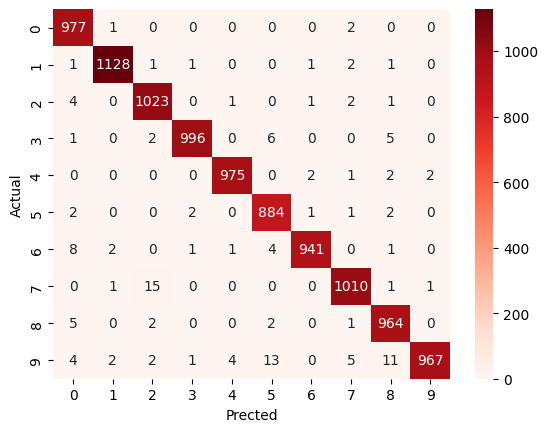

In [10]:
train_evaluation_cnn =cnn.evaluate(X_train, y_train)
test_evaluation_cnn= cnn.evaluate(X_test, y_test)
print("-"*80)
print(f"Train Loss = {train_evaluation_cnn[0]}, Train Accuracy = {test_evaluation_cnn[1]}")
print("-"*80)
print(f"Test Loss = {train_evaluation_cnn[0]}, Test Accuracy = {test_evaluation_cnn[1]}")
print("-"*80)

pred = cnn.predict(X_test)
predictions = np.argmax(pred, axis=1)
print(classification_report(y_test, predictions))

cm = tf.math.confusion_matrix(labels=y_test, predictions=predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Prected')
plt.ylabel('Actual')
plt.show()

### **Prediction**

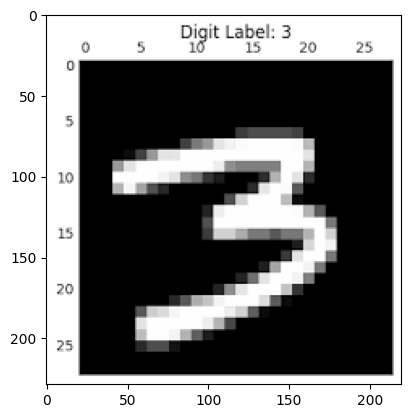

In [32]:
img = cv2.imread('3.png')
plt.imshow(img)
plt.show()

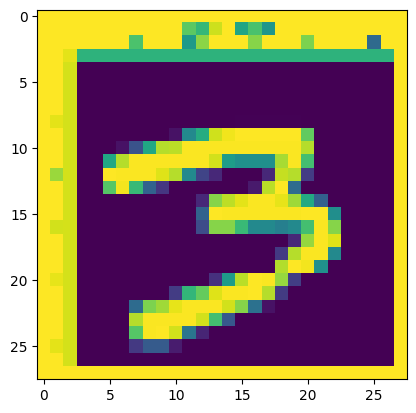

In [33]:
img_resized = tf.image.resize(img,size=(28,28))
gray_image = tf.image.rgb_to_grayscale(img_resized)
plt.imshow(gray_image)

In [34]:
gray_image.shape

TensorShape([28, 28, 1])

In [46]:
predicted = cnn.predict(np.expand_dims(gray_image/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [47]:
print(np.argmax(predicted))

3


### **Saving the trained model**

In [38]:
import os

In [41]:
cnn.save(os.path.join('models','cnn.h5'))
ann.save(os.path.join('models','ann.h5'))

### **Loading the trained model**

In [43]:
new_model = load_model('models/cnn.h5')

In [44]:
pred = new_model.predict(np.expand_dims(gray_image/255,0))
print(np.argmax(pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
3
